# Simulator and Real Quantum Computer
In this chapter, we are going to learn how to run a quantum code on a simulator and on real quantum computer.

### Use the following line of code in Every Qiskit Notebook to import needed libraries.

In [2]:
from qiskit import *       # importing all the necessary commands like Aer, execute
from qiskit.tools.visualization import plot_bloch_multivector
import random
import numpy as np
import matplotlib.pyplot as plt

## Creating Circuit
We design a quantum circuit with a single quantum bit and a single classical bit.

We apply the NOT operator on the quantum bit, and then we measure the quantum bit, the outcome of which will be saved on the classical bit.

A quantum circuit is composed by quantum and classical bits in Qiskit.

In [2]:
q= QuantumRegister(1,"qreg")     # in this example we will use a single quantum bit
                                 # the second parameter is optional

To retrieve an information from a quantum bit, it must be measured. The measurement result is stored classically. Therefore, we also use a classical regiser with classical bit(s)

In [3]:
c = ClassicalRegister(1,"creg")  # in this example we will use a single classical bit
                                 # the second parameter is optional

Now we can define our quantum circuit. It is composed by a quantum and a classical registers

In [4]:
qc = QuantumCircuit(q,c)

we apply operators on quantum bits
* operators are called as gates
* we apply NOT operator represented as "x" in qiskit
* operator is a part of the circuit, and we should specify the quantum bit as its parameter

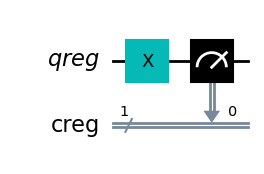

In [5]:
qc.x(q[0])    # (quantum) bits are enumerated starting from 0
              # NOT operator or x-gate is applied to the first qubit of the quantum register
              

# Measurement is defined by associating a quantum bit to a classical bit.
        
qc.measure(q[0],c[0])

# after the measurement, the observed value of the quantum bit is stored in the classical bit

# we can draw the circuit by using matplotlib
qc.draw(output='mpl') 

## Running the Circuit on Quantum Simulator
we use the method "execute" and the object "Aer" from qiskit library

We create a job object for execution of the circuit. There are three parameters
* mycircuit
* backend on which it will be executed: we will use local simulator
* how many times it will be executed, by default it is 1024

{'1': 1024}


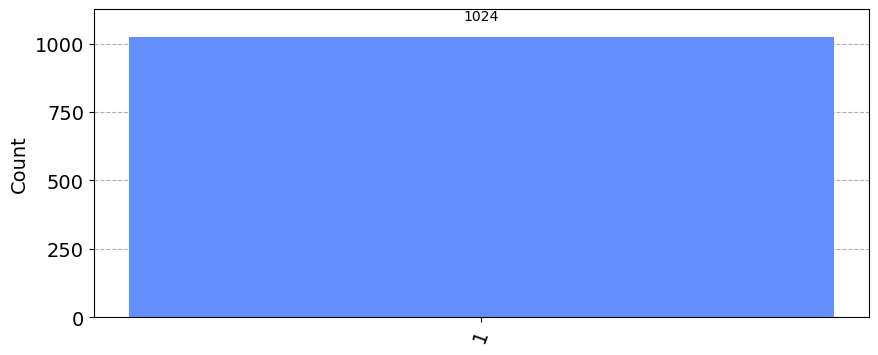

In [6]:
simulator=Aer.get_backend('qasm_simulator')
job = execute(qc,simulator,shots=1024)

# we can get the result of the outcome as follows
counts = job.result().get_counts(qc)
print(counts) # counts is a dictionary
# we can show the result by using histogram as follows
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(10,4) )

# Copy paste following line of code in Every Qiskit Notebook you want to start

In [7]:
from qiskit import IBMQ

In [8]:
IBMQ.save_account('3fb4021c5877a5461df10755c12a514b4e0b8f39c05098f1f68ff269c7d079f29ed1f1d1521320a4fd299cb10037c77d666312947d62bbebc316e1b231138595')

/tmp/ipykernel_7860/1251993827.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('3fb4021c5877a5461df10755c12a514b4e0b8f39c05098f1f68ff269c7d079f29ed1f1d1521320a4fd299cb10037c77d666312947d62bbebc316e1b231138595')
/tmp/ipykernel_7860/1251993827.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('3fb4021c5877a5461df10755c12a514b4e0b

In [9]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomputer=provider.get_backend('ibmq_lima')

In [10]:
job=execute(qc,backend=qcomputer)

In [11]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job is queued (None)

KeyboardInterrupt: 

In [ ]:
result=job.result().get_counts
plot_histogram(result.get_counts(qc))

In [12]:
q =  QuantumRegister(1) 
c = ClassicalRegister(1) 
qc = QuantumCircuit(q,c)

qc.x(q[0])

qc.measure(q[0],c[0])
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
counts = job.result().get_counts(qc)
print(counts) # counts is a dictionary

{'1': 1024}


In [16]:
q2 = QuantumRegister(1,"qreg")
c2 = ClassicalRegister(1,"creg")
qc2 = QuantumCircuit(q2,c2)


qc2.h(q2[0])
qc2.z(q2[0])
qc2.h(q2[0])
qc2.measure(q2,c2)
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc2)
print(counts) # counts is a dictionary

{'1': 100}


In [15]:
q2 = QuantumRegister(2,"qreg")
c2 = ClassicalRegister(2,"creg")
qc2 = QuantumCircuit(q2,c2)

qc2.x(q2[0])

qc2.measure(q2,c2)
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc2)
print(counts) # counts is a dictionary

{'01': 100}


In [21]:
q3 = QuantumRegister(2,"qreg")
c3 = ClassicalRegister(2,"creg")
qc3=QuantumCircuit(q3,c3)
qc3.h(0)

In [22]:
from qiskit import QuantumCircuit, execute, Aer

# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
qc.h(0)

# Measure the qubits
qc.measure_all()

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()

# Get the counts of the measurement outcomes
counts = result.get_counts()

# Print the results
print(counts)

{'01': 525, '00': 499}


In [26]:
q2 = QuantumRegister(2,"qreg")
c2 = ClassicalRegister(2,"creg")
qc2 = QuantumCircuit(q2,c2)


qc2.h(q2[0])
qc2.cx(q2[0],q2[1])
#Your code here

qc2.measure(q2,c2)
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc2)
print(counts) # counts is a dictionary

{'11': 247, '01': 243, '10': 260, '00': 250}
{'11': 497, '00': 503}


In [31]:
q2 = QuantumRegister(2,"qreg")
c2 = ClassicalRegister(2,"creg")
qc2 = QuantumCircuit(q2,c2)


qc2.h(q2[0])
qc2.cx(q2[0],q2[1])
qc2.x(q2[1])

qc2.measure(q2,c2)
job = execute(qc2,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc2)
print(counts) # counts is a dictionary

{'10': 500, '01': 500}


In [34]:
from math import pi

q =  QuantumRegister(1,"qreg") # quantum register with a single qubit
c = ClassicalRegister(1,"creg") # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

#Your code here

# measure the qubit
qc.measure(q,c)

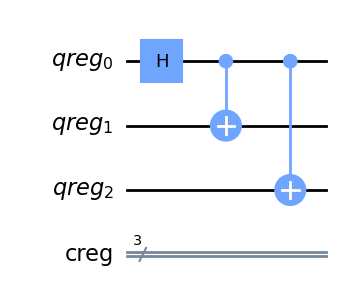

In [44]:
q = QuantumRegister(3,"qreg")
c = ClassicalRegister(3,"creg")
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[0],q[2])
qc.draw(output='mpl') 


In [46]:
qc.measure(q,c)
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1024)
counts = job.result().get_counts(qc)
print(counts) # counts is a dictionary

{'111': 505, '000': 519}


In [50]:
q6 = QuantumRegister(2,"q")
c6 = ClassicalRegister(2,"c")
qc6 = QuantumCircuit(q6,c6)

qc6.x(q[0])

qc6.measure(q6,c6)

In [16]:
from qiskit import *       # importing all the necessary commands like Aer, execute
from qiskit.tools.visualization import plot_bloch_multivector
import random
import numpy as np
import matplotlib.pyplot as plt
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
from math import pi

q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

qc.u(2*pi/3,0,0,q)
qc.draw()

┌─────────────┐
 q18: ┤ U(2π/3,0,0) ├
      └─────────────┘
c2: 1/═══════════════

In [20]:
plot_bloch_multivector(qc(q[0]))

TypeError: 'QuantumCircuit' object is not callable

In [15]:
plot_bloch_multivector(psi)

NameError: name 'psi' is not defined

In [21]:
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(1)  # quantum register with a single qubit
c = ClassicalRegister(1)  # classical register with a single bit
qc = QuantumCircuit(q, c)  # quantum circuit with quantum and classical registers

qc.rx(2 * pi / 3, q[0])  # Rotate the qubit by 120 degrees (2 * pi / 3 radians)

qc.measure(q, c)  # measure the qubit


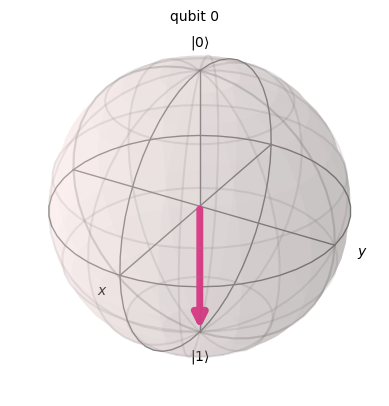

In [22]:
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector

q = QuantumRegister(1)  # quantum register with a single qubit
c = ClassicalRegister(1)  # classical register with a single bit
qc = QuantumCircuit(q, c)  # quantum circuit with quantum and classical registers

qc.rx(2 * pi / 3, q[0])  # Rotate the qubit by 120 degrees (2 * pi / 3 radians)

qc.measure(q, c)  # measure the qubit

backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
statevector = result.get_statevector()

plot_bloch_multivector(statevector)

# 2.2 QKD Quiz - Quantum characteristics leading to BB84 protocol (Session: July 4)

In [16]:
send=[]
for i in range(8):
    bit = random.getrandbits(1)
    send.append(bit)

print(send)

[1, 1, 1, 0, 0, 0, 1, 0]


In [18]:
qreg = QuantumRegister(8)
creg = ClassicalRegister(8)
asja = QuantumCircuit(qreg, creg, name='Asja')

for i, n in enumerate(send):
    if n==1:
        asja.x(qreg[i])
asja.draw()

┌───┐
q7_0: ┤ X ├
      ├───┤
q7_1: ┤ X ├
      ├───┤
q7_2: ┤ X ├
      └───┘
q7_3: ─────
           
q7_4: ─────
           
q7_5: ─────
      ┌───┐
q7_6: ┤ X ├
      └───┘
q7_7: ─────
           
c7: 8/═════

In [11]:
balvis = QuantumCircuit(qreg, creg, name='Balvis')
#SendState(asja, balvis, 'Asja')
balvis.measure(qreg,creg)
balvis.draw()

┌─┐                     
q1_0: ┤M├─────────────────────
      └╥┘┌─┐                  
q1_1: ─╫─┤M├──────────────────
       ║ └╥┘┌─┐               
q1_2: ─╫──╫─┤M├───────────────
       ║  ║ └╥┘┌─┐            
q1_3: ─╫──╫──╫─┤M├────────────
       ║  ║  ║ └╥┘┌─┐         
q1_4: ─╫──╫──╫──╫─┤M├─────────
       ║  ║  ║  ║ └╥┘┌─┐      
q1_5: ─╫──╫──╫──╫──╫─┤M├──────
       ║  ║  ║  ║  ║ └╥┘┌─┐   
q1_6: ─╫──╫──╫──╫──╫──╫─┤M├───
       ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q1_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
       ║  ║  ║  ║  ║  ║  ║ └╥┘
c1: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
       0  1  2  3  4  5  6  7

In [30]:
import hashlib

In [31]:
text="HelloQuantumWorld"

In [35]:
result=hashlib.sha256(b'text')

In [36]:
print("SHA256 is:", result.hexdigest())

SHA256 is: 982d9e3eb996f559e633f4d194def3761d909f5a3b647d1a851fead67c32c9d1
